# Fase 6: Resolución numérica de la Ecuación diferencial de Black-Scholes-Merton

Implementar un esquema de diferencias finitas implícitas para resolver la ecuación
diferencial de Black-Scholes-Merton, en el caso de una PUT europea y una opción binaria.

In [1]:
#Importo mis librerias
import numpy as np
import matplotlib.pyplot as plt
import Funciones

### Parámetros iniciales

In [2]:
# Defino los parámetros iniciales
S0 = 112      # Precio inicial del activo
K = 115       # Precio de ejercicio
r = 0.08      # Tasa libre de riesgo
sigma = 0.18  # Volatilidad
T = 1         # Tiempo a vencimiento (en años)

## Discretización del tiempo y riqueza

Definimos los parámetros de la malla y posteriormente generamos la malla de tiempo y riqueza.

\begin{equation*}
\Delta t = \frac{T}{N}, \quad \Delta S = \frac{S_{max}}{M}
\end{equation*}

In [3]:
#Parámetros de la malla
S_max= 2*K  # Precio máximo del activo
M= 100  # Número de puntos en la malla de precios
N = 100  # Número de puntos en la malla de tiempo
dS=S_max/M  # Tamaño del paso en la malla de precios
dT = T/N  # Tamaño del paso en la malla de tiempo

## Implementar condiciones de frontera apropiadas

Generamos la malla de tiempo y riqueza $V$ que es un vector de dimensión $M+1$. Luego definimos la condición de frontera al vencimiento de la opción PUT europea que es:
\begin{equation*}
V(S, T) = \max(K - S, 0)   
\end{equation*}
Y para la opción binaria:
\begin{equation*}
V(S, T) = \begin{cases}
1 & \text{si } S < K \\
0 & \text{si } S \geq K
\end{cases}
\end{equation*}

Además definimos las condiciones de frontera para $S = 0$ y $S = S_{max}$:
\begin{equation*}
V(0, t) = K e^{-r(T-t)}, \quad V(S_{max}, t) = 0
\end{equation*}

Y para la opción binaria:
\begin{equation*}
V(0, t) = e^{-r(T-t)}, \quad V(S_{max}, t) = 0
\end{equation*}

In [4]:
#Genramos las mallas para PUT y binario
V_put = Funciones.inicializar_malla(M, K,S_max, tipo='put')
V_binario = Funciones.inicializar_malla(M, K,S_max, tipo='binario')

#Añadimos las condiciones de frontera
V_put[0]=K*np.exp(-r*T)  # Condición de frontera inferior para PUT
V_put[-1] = 0  # Condición de frontera superior para PUT

V_binario[0]=np.exp(-r*T)  # Condición de frontera inferior para binario
V_binario[-1] = 0  # Condición de frontera superior para binario

## Solucionar la ecuación diferencial parcial

Implementamos el esquema de diferencias finitas implícitas para resolver la ecuación diferencial de Black-Scholes-Merton. Definimos los coeficientes del sistema de la siguiente manera:
\begin{equation*}
\alpha= \frac{\Delta t}{2} \left( \frac{\sigma^2 S_i^2}{(\Delta S)^2} - \frac{rS_i}{\Delta S} \right), \quad
\beta = 1 + \Delta t \left( \frac{\sigma^2 S_i^2}{(\Delta S)^2} + r \right), \quad
\gamma = \frac{\Delta t}{2} \left( \frac{\sigma^2 S_i^2}{(\Delta S)^2} + \frac{rS_i}{\Delta S} \right)
\end{equation*}

Luego, construimos la matriz del sistema $A$ de dimensiones $(M-1) \times (M-1)$. $-\alpha$ será la subdiagonal, $\beta$ la diagonal y $-\gamma$ la superdiagonal.

Posterior a esto, resolvemos el sistema lineal en cada paso de tiempo hacia atrás.

In [5]:
#Matriz tridiagonal
A = Funciones.crear_matriz_tridiagonal(M, dS, dT, sigma, r)

#Calculamos las soluciones
put_sol= Funciones.solucion_implicita(dT,A,V_put,K,r,dS,S0,T,N,tipo='put')
bin_sol= Funciones.solucion_implicita(dT,A,V_binario,K,r,dS,S0,T,N,tipo='binario')

## Calcular el error

Calcular el error absoluto en términos del tamaño de las subdiviciones de $\Delta t$ y $\Delta S$ de la
discretización. Tomamos diferentes valores de $M$ y $N$ y calculamos el error absoluto como:
\begin{equation*}
\text{Error absoluto} = \left| V_{numérico} - V_{analítico} \right|
\end{equation*}

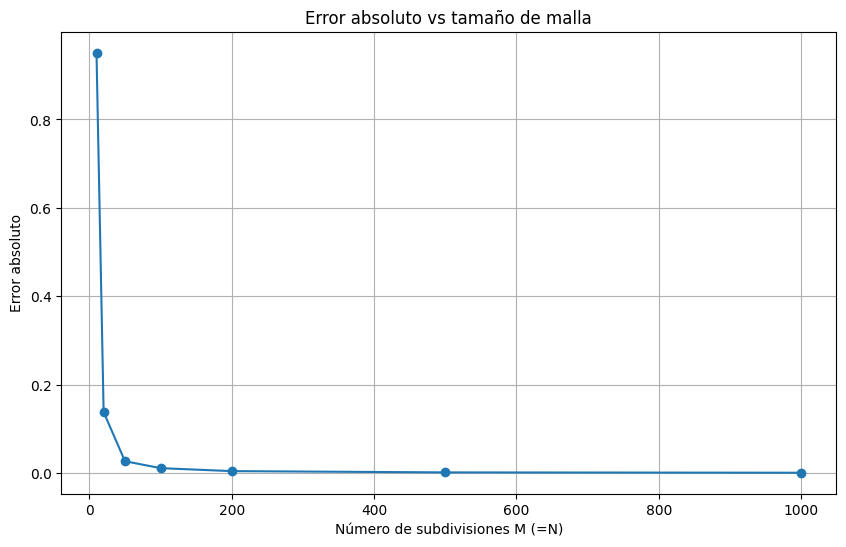

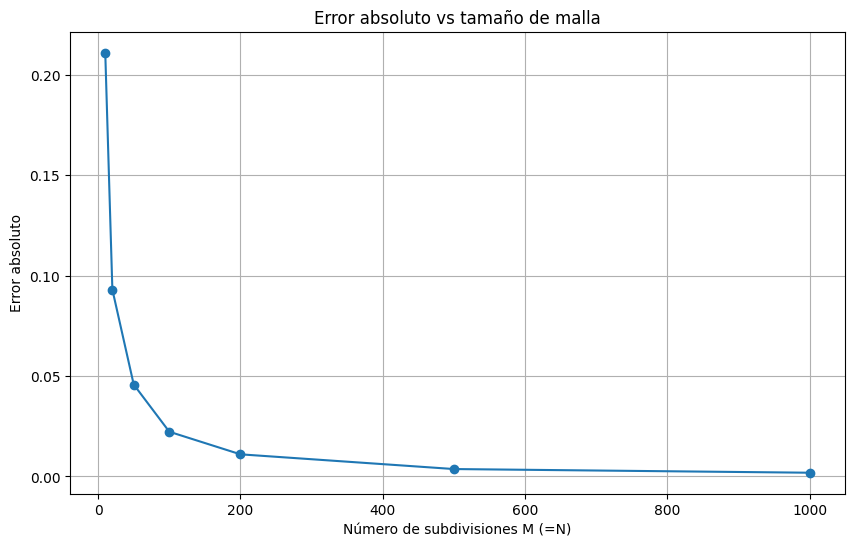

Resultados para la opción PUT:
M=10, N=10 -> Valor numérico: 4.2935, Valor exacto: 5.2444, Error: 9.5088e-01
M=20, N=20 -> Valor numérico: 5.1062, Valor exacto: 5.2444, Error: 1.3815e-01
M=50, N=50 -> Valor numérico: 5.2174, Valor exacto: 5.2444, Error: 2.6950e-02
M=100, N=100 -> Valor numérico: 5.2331, Valor exacto: 5.2444, Error: 1.1277e-02
M=200, N=200 -> Valor numérico: 5.2398, Valor exacto: 5.2444, Error: 4.5339e-03
M=500, N=500 -> Valor numérico: 5.2427, Valor exacto: 5.2444, Error: 1.6670e-03
M=1000, N=1000 -> Valor numérico: 5.2435, Valor exacto: 5.2444, Error: 9.1965e-04

Resultados para la opción binaria:
M=10, N=10 -> Valor numérico: 0.1747, Valor exacto: 0.3857, Error: 2.1091e-01
M=20, N=20 -> Valor numérico: 0.2927, Valor exacto: 0.3857, Error: 9.2996e-02
M=50, N=50 -> Valor numérico: 0.4314, Valor exacto: 0.3857, Error: 4.5737e-02
M=100, N=100 -> Valor numérico: 0.4079, Valor exacto: 0.3857, Error: 2.2237e-02
M=200, N=200 -> Valor numérico: 0.3966, Valor exacto: 0.3857, E

In [6]:
valoresMN=[(10,10), (20,20), (50,50), (100,100), (200,200), (500,500), (1000,1000)]
errores_put = Funciones.calcular_errores(S0, K, r, sigma, T, valoresMN,S_max,tipo='put')
errores_binario = Funciones.calcular_errores(S0, K, r, sigma, T, valoresMN,S_max,tipo='binario')

print("Resultados para la opción PUT:")
for M, N, num, ref, err in errores_put:
    print(f"M={M}, N={N} -> Valor numérico: {num:.4f}, Valor exacto: {ref:.4f}, Error: {err:.4e}")

print("\nResultados para la opción binaria:")
for M, N, num, ref, err in errores_binario:
    print(f"M={M}, N={N} -> Valor numérico: {num:.4f}, Valor exacto: {ref:.4f}, Error: {err:.4e}")

## Comparar con Monte Carlo
Finalmente, comparamos los resultados obtenidos con el método de diferencias finitas implícitas con los resultados obtenidos mediante el método de Monte Carlo. Para esto, generamos un número suficiente de trayectorias de precios y calculamos el valor esperado de la opción PUT europea y la opción binaria.


Comparación entre Método Implícito y Monte Carlo
Parámetros: S0=112, K=115, r=0.08, σ=0.18, T=1, M=N=1000, paths=1000000

 tipo de opción: put
Black-Scholes: 5.244380
Monte Carlo: 5.241851
Método Implícito: 5.243460
Error absoluto: 0.001609


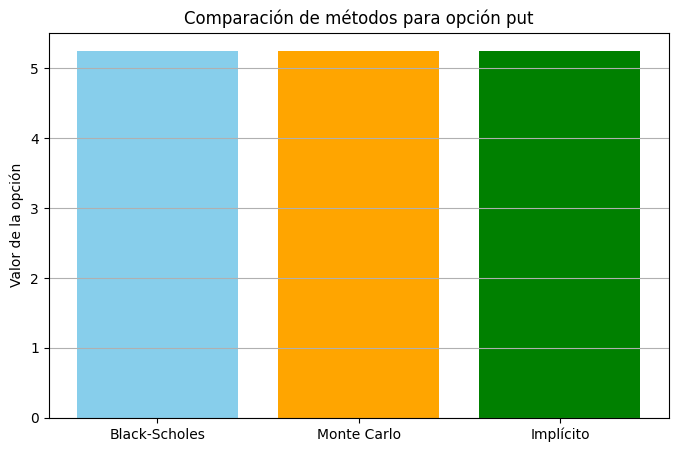


Comparación entre Método Implícito y Monte Carlo
Parámetros: S0=112, K=115, r=0.08, σ=0.18, T=1, M=N=1000, paths=1000000

 tipo de opción: binario
Black-Scholes: 0.385653
Monte Carlo: 0.385594
Método Implícito: 0.383818
Error absoluto: 0.001776


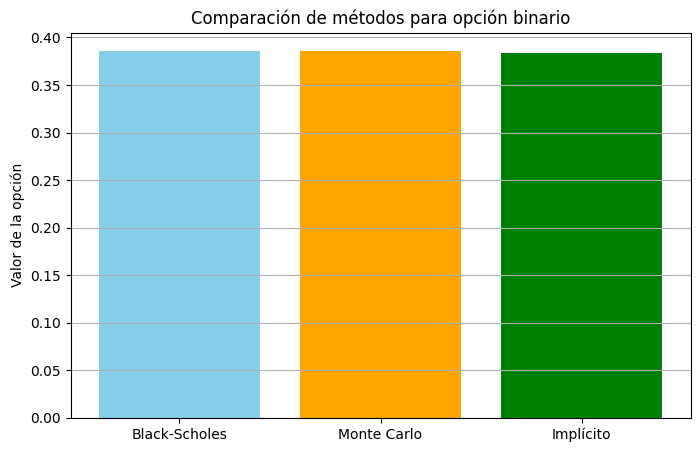

(np.float64(0.3856534351358836),
 np.float64(0.38559400593281523),
 np.float64(0.383818289923177))

In [7]:
#Utilizamos la función para comparar las soluciones

#Comparamos opción PUT
Funciones.comparar_soluciones(S0, K, r, sigma, T, valoresMN, S_max,M,N, n_paths=1000000, tipo='put')

#Comparamos opción binaria
Funciones.comparar_soluciones(S0, K, r, sigma, T, valoresMN, S_max,M,N, n_paths=1000000, tipo='binario')